# Warsztaty Python w Data Science

---
## Część 2 z 2 - Zaawansowana wizualizacja danych  

- ## Pobranie danych
   #### - JSON. Pobieranie danych ze zdalnych API.
   #### - Data Wrangling

- ##  Przykłady _*Feature Engineering*_
- ##  Wizualizacja przykładu

---

# "'Applied machine learning' is basically feature engineering.” <div style="text-align: right">—  Prof. Andrew Ng.</div> 

---

# Zadanie 1

Narysuj wykres o kształcie okręgu



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("dark_background")
circle=plt.Circle((0,0),2)
# here must be something like circle.plot() or not?
ax=plt.gca()
ax.add_patch(circle)
plt.axis('scaled')
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")

u = np.linspace(-1, 1, 100)

x = 10 * np.outer(np.cos(u), np.sin(u))
plt.plot(u,np.sqrt(1-u*u))
plt.plot(u,-np.sqrt(1-u*u))
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")

u = np.linspace(-1, 1, 100)

plt.subplot(211)
x = 10 * np.outer(np.cos(u), np.sin(u))
plt.plot(u,np.sqrt(1-u*u))
plt.plot(u,-np.sqrt(1-u*u))

plt.subplot(212)
x = 10 * np.outer(np.cos(u), np.sin(u))
plt.plot(u,np.sqrt(1-u*u))
plt.plot(u,-np.sqrt(1-u*u))
plt.show()

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
# Plot circle or radius 3
plt.style.use("dark_background")

an = np.linspace(0, 2*np.pi, 100)

plt.subplot(221)
plt.plot(3*np.cos(an), 3*np.sin(an))
plt.title('nierówne osie, elipsa', fontsize=10)

plt.subplot(222)
plt.plot(3*np.cos(an), 3*np.sin(an))
plt.axis('equal')
plt.title('równe', fontsize=10)

plt.subplot(223)
plt.plot(3*np.cos(an), 3*np.sin(an))
plt.axis('equal')
plt.axis([-3, 3, -3, 3])
plt.title('okrąg, nawet po zmiane zakresów', fontsize=10)

plt.subplot(224)
plt.plot(3*np.cos(an), 3*np.sin(an))
plt.axis('equal')
plt.axis([-3, 3, -3, 3])
plt.plot([0, 4], [0, 2])
plt.title('równe, i to z linią', fontsize=10)

plt.show()

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
  
# setting the axes projection as polar 
plt.axes(projection = 'polar') 
  
# setting the radius 
r = 2
  
# creating an array containing the 
# radian values 
rads = np.arange(0, (4 * np.pi), 0.01) 
  
# plotting the circle 
for rad in rads: 
    plt.polar(rad, rad/2, 'r.') 
  
# display the Polar plot 
plt.show() 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
  
# setting the axes projection as polar 
plt.axes(projection = 'polar') 
  
# setting the radius 
r = 2
  
# creating an array containing the 
# radian values 
rads = np.arange(0, (4 * np.pi), 0.01) 
  
# plotting the circle 
for rad in rads: 
    plt.polar(rad, 2, 'r.') 
  
# display the Polar plot 
plt.show() 

---

# Zadanie 2

Korzystając z następujących danych:
    
http://astronomia.zagan.pl/art/wspolrzedne.html

https://pl.wikipedia.org/wiki/Dane_statystyczne_o_miastach_w_Polsce
    
    
Zamieść na mapie Polski 50 największych miast, ze wielkością znacznika odpowiadającą liczbie mieszkańców

In [ ]:
import pandas as pd

miasta = pd.read_csv('data\pl_miasta.csv', delimiter='\t')

In [ ]:
miasta.head()

In [ ]:
columns = list(miasta.columns)

In [ ]:
columns[3]='powierzchnia'
columns[4]='ludnosc'
columns[5]='zaludnienie'
miasta.columns=columns
miasta.head()

In [ ]:
wspolrzedne=pd.read_fwf('data\pl_wspolrzedne.csv',infer_nrows=3, encoding='utf8')

In [ ]:
wspolrzedne.head()

In [ ]:
wspolrzedne.columns=['Miasto', 'Dlugosc', 'Szerokosc']
wspolrzedne.head()

In [ ]:
miasta2=miasta.sort_values(by=['ludnosc'], ascending=False)
miasta2.reset_index(inplace=True)
miasta2.head()

In [ ]:
miasta=miasta.sort_values(by=['ludnosc'], ascending=False)
miasta.reset_index(inplace=True, drop=True)
miasta.head()

In [ ]:
miasta=miasta.nlargest(50, ['ludnosc'])

In [ ]:
miasta

In [ ]:
miasta_z_indeksem=miasta.reset_index()
miasta_z_indeksem.head()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='index',
                     y='ludnosc',
                     linestyle='-', marker='o',
                     palette='bright',  markeredgecolor="black",   
                     data=miasta_z_indeksem
                    )

chart.set_title('Ludnosc miast w Polsce')
plt.show();

In [ ]:
df=miasta.set_index('Miasto').join(wspolrzedne.set_index('Miasto'))

In [ ]:
df

In [ ]:
df.reset_index(inplace=True, drop=False)

In [ ]:
df.shape

In [ ]:
df

In [ ]:
miasta_na_wykres = {}

for ind in df.index: 
    print(df['Miasto'][ind], df['Dlugosc'][ind] , df['Szerokosc'][ind] , df['ludnosc'][ind])
    

In [ ]:
def geo2float(s):
    s=s.replace('°','.')
    s=s[:5]
    return float(s)

In [ ]:
geo2float("19°28'E")

In [ ]:
import numpy as np

miasta_na_wykres = {}

for ind in df.index: 
    try:
        miasta_na_wykres[df['Miasto'][ind]] = { 'pos': (
                                                     geo2float(df['Szerokosc'][ind]),
                                                     geo2float(df['Dlugosc'][ind])
                                                   ),
                                             'ilosc': df['ludnosc'][ind]//50000,
                                             'symbol': 'ro'
                                              }
    except:
        print('Problem w %s'%df['Miasto'][ind] )

In [ ]:
miasta_na_wykres 

In [ ]:
import mpl_toolkits

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.style.use("classic")
miasta = miasta_na_wykres
# zakres mapy (Polska)
lat_min, lat_max = 48.8, 55.0
lon_min, lon_max = 13.8, 24.4

# wymiary rysunku
fig = plt.figure(figsize=(10.0, 9.0))

# marginesy
plt.subplots_adjust(left=0.10, right=0.90, top=0.90, bottom=0.10, wspace=0.15, hspace=0.05)

# tworzenie mapy dla Polski
m = Basemap(resolution='i', projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)

# grubość granic i linii wybrzeży
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)

#m.drawrivers()

# równoleżniki i południki
m.drawparallels(np.arange(lat_min, lat_max, 1.), labels=[1,0,0,0], color='black', dashes=[1,5], labelstyle='+/-', linewidth=0.2)
m.drawmeridians(np.arange(lon_min, lon_max, 1.), labels=[0,0,0,1], color='black', dashes=[1,5], labelstyle='+/-', linewidth=0.2)

# rysowanie danych
for nazwa, dane in miasta.items():
    # współrzędne w odwrotnej kolejności
    x, y = m(dane['pos'][1]+0.15, dane['pos'][0]+0.32)

    # narysowanie symbolu
    m.plot(x, y, dane['symbol'], markersize=dane['ilosc'])

    # wypisanie etykiety (z przesunięciem)
    plt.text(x+(dane['ilosc']*1000), y+(dane['ilosc']*1000), nazwa)

# tytul
plt.title("Miasta na terenie Polski")

# i wyslanie na ekran
plt.show();

# ... I już wiem czemu używa się `cartopy`

## W `cartopy` mamy `transform` i `projection` jasno zdefiniowane
## I ma mniej bugów ... 

---

## Pobranie danych ze zdalnych API

API

https://api.covid19api.com/

## JavaScript Object Notation - JSON

In [82]:
import json
from pprint import pprint

data = [ {"Name": "Jan", "Surname": "Kowalski", "Age": 37}, {"Name": "Marek", "Surname": "Nowak", "Age": 53}]

my_json_string = json.dumps(data)
type(my_json_string)
pprint(my_json_string)

('[{"Name": "Jan", "Surname": "Kowalski", "Age": 37}, {"Name": "Marek", '
 '"Surname": "Nowak", "Age": 53}]')


In [83]:
my_json_object = json.loads(my_json_string)
pprint(my_json_object)

[{'Age': 37, 'Name': 'Jan', 'Surname': 'Kowalski'},
 {'Age': 53, 'Name': 'Marek', 'Surname': 'Nowak'}]


# Pobieranie danych ze zdalnych API

In [84]:
import requests

In [85]:
import requests

url = "https://api.covid19api.com/"
response = requests.request(method="GET", url=url)
print(response.text)

{"countriesRoute":{"Name":"Get List Of Countries","Description":"Returns all countries and associated provinces. The country_slug variable is used for country specific data","Path":"/countries"},"countryDayOneRoute":{"Name":"Get List Of Cases Per Country Per Province By Case Type From The First Recorded Case","Description":"Returns all cases by case type for a country from the first recorded case. Country must be the country_slug from /countries. Cases must be one of: confirmed, recovered, deaths","Path":"/dayone/country/:country"},"countryDayOneTotalRoute":{"Name":"Get List Of Cases Per Country By Case Type From The First Recorded Case","Description":"Returns all cases by case type for a country from the first recorded case. Country must be the country_slug from /countries. Cases must be one of: confirmed, recovered, deaths","Path":"/total/dayone/country/:country"},"countryRoute":{"Name":"Get List Of Cases Per Country Per Province By Case Type","Description":"Returns all cases by case

In [86]:
from pprint import pprint

json_response = response.json()
pprint(json_response["countriesRoute"])

{'Description': 'Returns all countries and associated provinces. The '
                'country_slug variable is used for country specific data',
 'Name': 'Get List Of Countries',
 'Path': '/countries'}


In [87]:
url = "https://api.covid19api.com/countries"
response = requests.request(method="GET", url=url)
pprint(response.json()[:15])

[{'Country': 'Cayman Islands', 'ISO2': 'KY', 'Slug': 'cayman-islands'},
 {'Country': 'El Salvador', 'ISO2': 'SV', 'Slug': 'el-salvador'},
 {'Country': 'Russian Federation', 'ISO2': 'RU', 'Slug': 'russia'},
 {'Country': 'Switzerland', 'ISO2': 'CH', 'Slug': 'switzerland'},
 {'Country': 'Eritrea', 'ISO2': 'ER', 'Slug': 'eritrea'},
 {'Country': 'Slovakia', 'ISO2': 'SK', 'Slug': 'slovakia'},
 {'Country': 'Spain', 'ISO2': 'ES', 'Slug': 'spain'},
 {'Country': 'Tuvalu', 'ISO2': 'TV', 'Slug': 'tuvalu'},
 {'Country': 'United Kingdom', 'ISO2': 'GB', 'Slug': 'united-kingdom'},
 {'Country': 'Guam', 'ISO2': 'GU', 'Slug': 'guam'},
 {'Country': 'Niue', 'ISO2': 'NU', 'Slug': 'niue'},
 {'Country': 'Pakistan', 'ISO2': 'PK', 'Slug': 'pakistan'},
 {'Country': 'Saint Lucia', 'ISO2': 'LC', 'Slug': 'saint-lucia'},
 {'Country': 'Tajikistan', 'ISO2': 'TJ', 'Slug': 'tajikistan'},
 {'Country': 'Togo', 'ISO2': 'TG', 'Slug': 'togo'}]


In [88]:
import json
import requests 
import pandas as pd
import numpy as np
from datetime import datetime 
import warnings
warnings.filterwarnings("ignore")

countries = ['us']

url = "https://api.covid19api.com/total/dayone/country/%s"

input_data = []

with requests.Session() as s:
    for country in countries:
        input_data += s.get(url%country).json()
        
input_data

[{'Country': 'United States of America',
  'CountryCode': '',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '0',
  'Lon': '0',
  'Confirmed': 1,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 1,
  'Date': '2020-01-22T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': '',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '0',
  'Lon': '0',
  'Confirmed': 1,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 1,
  'Date': '2020-01-23T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': '',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '0',
  'Lon': '0',
  'Confirmed': 2,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 2,
  'Date': '2020-01-24T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': '',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '0',
  'Lon': '0',
  'Confirmed': 2,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 2,
  'Date': '2020-01-25T00:00:00Z'},
 {'Country': 'United States of Ameri

In [90]:
import json
import requests 
import pandas as pd
import numpy as np
from datetime import datetime 
import warnings
warnings.filterwarnings("ignore")

countries = ['pl', 'us', 'it', 'uk', 'es', 'cn', 'ir', 'tr', 'se', 'de' ]

url = "https://api.covid19api.com/total/dayone/country/%s"

input_data = []

with requests.Session() as s:
    for country in countries:
        input_data += s.get(url%country).json()

now = datetime.now().strftime("%Y-%m-%d")
countries.append(now)
fname = 'data\\'+'-'.join(countries)+".json"
with open(fname, 'w') as f:
    json.dump(input_data, f)
    print(f'Zapisałem plik {fname}')

print("Przeczytano %d wierszy " % len(input_data) )

raw_data = pd.DataFrame(input_data)
raw_data

Zapisałem plik data\pl-us-it-uk-es-cn-ir-tr-se-de-2021-01-20.json
Przeczytano 3478 wierszy 


,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Poland,,,,,0,0,1,0,0,1,2020-03-04T00:00:00Z
1,Poland,,,,,0,0,1,0,0,1,2020-03-05T00:00:00Z
2,Poland,,,,,0,0,5,0,0,5,2020-03-06T00:00:00Z
3,Poland,,,,,0,0,5,0,0,5,2020-03-07T00:00:00Z
4,Poland,,,,,0,0,11,0,0,11,2020-03-08T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
3473,Germany,,,,,0,0,2023828,45705,1664176,313947,2021-01-15T00:00:00Z
3474,Germany,,,,,0,0,2038645,46464,1680479,311702,2021-01-16T00:00:00Z
3475,Germany,,,,,0,0,2050129,46901,1709540,293688,2021-01-17T00:00:00Z
3476,Germany,,,,,0,0,2059382,47263,1713196,298923,2021-01-18T00:00:00Z


---
## Parametry sterujące analizą
- `DAYS_WINDOW` - za ile dni wstecz od najświeższych danych w zbiorze ma być wykonana analiza np. `DAYS_WINDOW=7` - dane z tygodnia
- `N` - dla ilu krajów naraz ma być wykonana analiza
- `SET` - dla której _"N-ki"_  ma być wykonana analiza; np. przy `N=10` dla `SET=0` będzie to 1-sza dziesiątka, `SET=1` będzie to 2-ga dziesiątka itd.
- `ROLL` - za ile dni ma być liczona średnia krocząca
- `DELTADAYS` - przy ustalaniu składu kolejnych `N` brana jest wartość `Confirmed` sprzed `DELTADAYS` dni. Przydaje się w sytuacji gdy nie "spłynęły" wszystkie dane dla bieżącego dnia
---

In [112]:
DAYS_WINDOW=60
N=10 
SET=0
ROLL=7
DELTADAYS=1

In [113]:

data = raw_data[ ["Country", "CountryCode", "Confirmed", "Deaths", "Recovered", "Active", "Date"] ]
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', format='%Y-%m-%dT%H:%M:%S') 
data['Day'] = data['Date'].dt.date

data = data.dropna()
print("Na wejściu mamy %d rekordów i %d kolumn" % (data.shape[0],data.shape[1]))

lastday = max(data["Date"])
daysbefore = lastday + pd.Timedelta(days=-DAYS_WINDOW)
print("Dane od %s do %s" % (str(daysbefore).split(' ')[0], str(lastday).split(' ')[0]) )

lastday = lastday + pd.Timedelta(days=-DELTADAYS)

df = data[ data["Date"] > pd.to_datetime(daysbefore) ]
print("Zostało %d rekordów i %d kolumn" % (df.shape[0],df.shape[1]))

## Czyścimy śmieci
df = df.replace('Iran (Islamic Republic of)', 'Iran')
df = df.replace('Iran, Islamic Republic of', 'Iran')
df = df.replace('Korea, South', 'South Korea')
df = df.replace('Korea (South)', 'South Korea')
df = df.replace('Republic of Korea', 'South Korea')
df = df.replace('Russian Federation', 'Russia')
df = df.replace(' Azerbaijan', 'Azerbaijan')
df = df.replace('Republic of Ireland', 'Ireland')
df = df.replace('Republic of Moldova', 'Moldova')
df = df.replace('Hong Kong SAR', 'Hong Kong')
df = df.replace('Taipei and environs', 'Taiwan')
df = df.replace('Taiwan*', 'Taiwan')


confirmed = df[['Country', 'CountryCode', 'Date', 'Day', 'Confirmed']]
confirmed["status"] = "Confirmed"
confirmed.rename(columns={'Confirmed':'cases'}, inplace=True)
deaths = df[['Country', 'CountryCode', 'Date', 'Day', 'Deaths']]
deaths["status"] = "Deaths"
deaths.rename(columns={'Deaths':'cases'}, inplace=True)
recovered = df[['Country', 'CountryCode', 'Date', 'Day', 'Recovered']]
recovered["status"] = "Recovered"
recovered.rename(columns={'Recovered':'cases'}, inplace=True)
active = df[['Country', 'CountryCode', 'Date', 'Day', 'Active']]
active["status"] = "Active"
active.rename(columns={'Active':'cases'}, inplace=True)

df = pd.concat([confirmed, deaths, recovered, active], axis=0, sort=False)
print("Po 'ręcznym' melt mamy %d rekordów i %d kolumn: %s" % ( df.shape[0],df.shape[1], " ".join(df.columns) ))

df = df.groupby(['Country', 'CountryCode', 'Date', 'Day', 'status', 'cases',]).sum()
df.reset_index(inplace=True)
print("Po agregacji prowincji mamy %d rekordów i %d kolumn: %s" % ( df.shape[0],df.shape[1], " ".join(df.columns) ))


df = df.pivot_table(
        values='cases', 
        index=['Country', 'CountryCode', 'Date', 'Day'], 
        columns='status', 
        aggfunc=np.sum)

df.reset_index(inplace=True)

print("Po operacji pivot mamy %d rekordów i %d kolumn:  %s" % ( df.shape[0], df.shape[1], " ".join(df.columns) ))

topdf = df[ df["Date"] == lastday ]
topdf.reset_index(inplace=True)
topdf = topdf.sort_values(by=['Confirmed'], ascending=False)

topdf.reset_index(drop=True, inplace=True)

first_N_countries = topdf.iloc[N*SET:N*SET+N]["Country"]
smaller_top_N = topdf.iloc[N*SET:(N*SET+N//2)]["Country"]

italy = df[ df['Country'] == 'Italy'  ] 
us = df[ df['Country'] == 'United States of America'  ] 

df = df[ df['Country'].isin(first_N_countries)  ]
df = df.sort_values(by=['Country', 'Date'])
df.reset_index(inplace=True)

print("Po odfiltrowaniu mamy %d rekordów i %d kolumn: %s" % ( df.shape[0],df.shape[1]," ".join(df.columns) ))
print("Przygotowane dane z %d dni dla %d krajów" % 
      ( len(df["Date"].value_counts()), len(df["Country"].value_counts()) ))

df.head()

smaller_df = df[ df['Country'].isin(smaller_top_N)  ]
smaller_df = smaller_df.sort_values(by=['Country', 'Date'])
smaller_df.reset_index(drop=True, inplace=True)

print("Po odfiltrowaniu mniejszych danych mamy %d rekordów i %d kolumn: %s" % ( smaller_df.shape[0],smaller_df.shape[1]," ".join(smaller_df.columns) ))
print("Przygotowane mniejsze dane z %d dni dla %d krajów" % 
      ( len(smaller_df["Date"].value_counts()), len(smaller_df["Country"].value_counts()) ))
smaller_df.head()

Na wejściu mamy 3478 rekordów i 8 kolumn
Dane od 2020-11-20 do 2021-01-19
Zostało 600 rekordów i 8 kolumn
Po 'ręcznym' melt mamy 2400 rekordów i 6 kolumn: Country CountryCode Date Day cases status
Po agregacji prowincji mamy 2400 rekordów i 6 kolumn: Country CountryCode Date Day status cases
Po operacji pivot mamy 600 rekordów i 8 kolumn:  Country CountryCode Date Day Active Confirmed Deaths Recovered
Po odfiltrowaniu mamy 600 rekordów i 9 kolumn: index Country CountryCode Date Day Active Confirmed Deaths Recovered
Przygotowane dane z 60 dni dla 10 krajów
Po odfiltrowaniu mniejszych danych mamy 300 rekordów i 9 kolumn: index Country CountryCode Date Day Active Confirmed Deaths Recovered
Przygotowane mniejsze dane z 60 dni dla 5 krajów


status,index,Country,CountryCode,Date,Day,Active,Confirmed,Deaths,Recovered
0,180,Italy,,2020-11-21 00:00:00+00:00,2020-11-21,791746,1380531,49261,539524
1,181,Italy,,2020-11-22 00:00:00+00:00,2020-11-22,805947,1408868,49823,553098
2,182,Italy,,2020-11-23 00:00:00+00:00,2020-11-23,796849,1431795,50453,584493
3,183,Italy,,2020-11-24 00:00:00+00:00,2020-11-24,798386,1455022,51306,605330
4,184,Italy,,2020-11-25 00:00:00+00:00,2020-11-25,791697,1480874,52028,637149


In [114]:
topdf.head(30)

status,index,Country,CountryCode,Date,Day,Active,Confirmed,Deaths,Recovered
0,598,United States of America,,2021-01-18 00:00:00+00:00,2021-01-18,23675677,24078772,399003,0
1,538,United Kingdom,,2021-01-18 00:00:00+00:00,2021-01-18,3345073,3443350,90031,8246
2,478,Turkey,,2021-01-18 00:00:00+00:00,2021-01-18,98033,2392963,24161,2270769
3,238,Italy,,2021-01-18 00:00:00+00:00,2021-01-18,547059,2390102,82554,1760489
4,358,Spain,,2021-01-18 00:00:00+00:00,2021-01-18,2132306,2336451,53769,150376
5,118,Germany,,2021-01-18 00:00:00+00:00,2021-01-18,298923,2059382,47263,1713196
6,298,Poland,,2021-01-18 00:00:00+00:00,2021-01-18,217788,1438914,33407,1187719
7,178,Iran,,2021-01-18 00:00:00+00:00,2021-01-18,153832,1336217,56886,1125499
8,418,Sweden,,2021-01-18 00:00:00+00:00,2021-01-18,513163,523486,10323,0
9,58,China,,2021-01-18 00:00:00+00:00,2021-01-18,2103,98164,4798,91263


# Wizualizacja

In [115]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Wykres dla `N` krajów

In [116]:
def fix_legend(chart, marker="o"):
    handles, labels = chart.get_legend_handles_labels()
    sorting_order = dict(map(lambda x: (x[1],x[0]), enumerate(first_N_countries)))
    labels_handles = list(zip(labels,handles))

    labels_handles.sort(key = lambda x: sorting_order.get(x[0],-1))
    labels = [ x[0] for x in labels_handles[1:]]
    handles = [ x[1] for x in labels_handles[1:]]
    for handle in handles: 
        handle.set_marker(marker)
        handle.set_markeredgecolor("black")
        
    return handles, labels

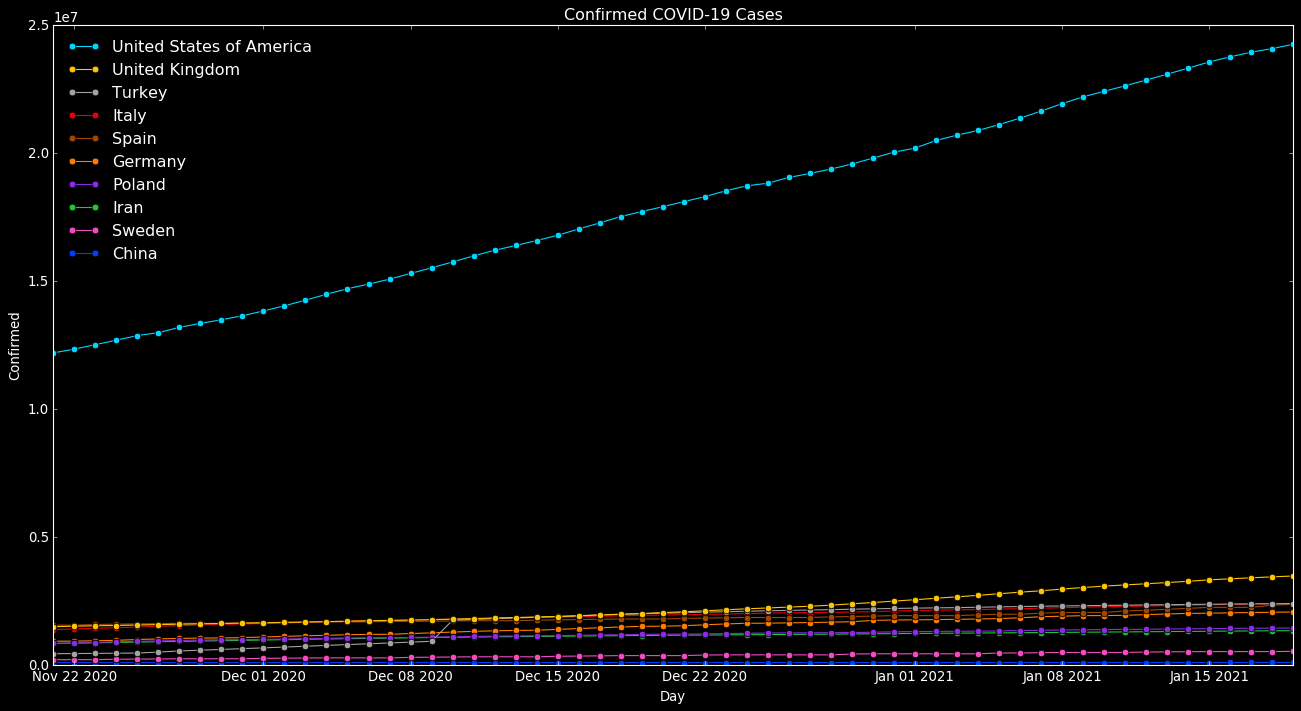

In [117]:

plt.figure(figsize=(20,10))


plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='Confirmed',
                     hue='Country',linestyle='-', marker='o',
                     palette='bright',  markeredgecolor="black",   
                     data=df
                    )

chart.set_title('Confirmed COVID-19 Cases')

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")

plt.show();

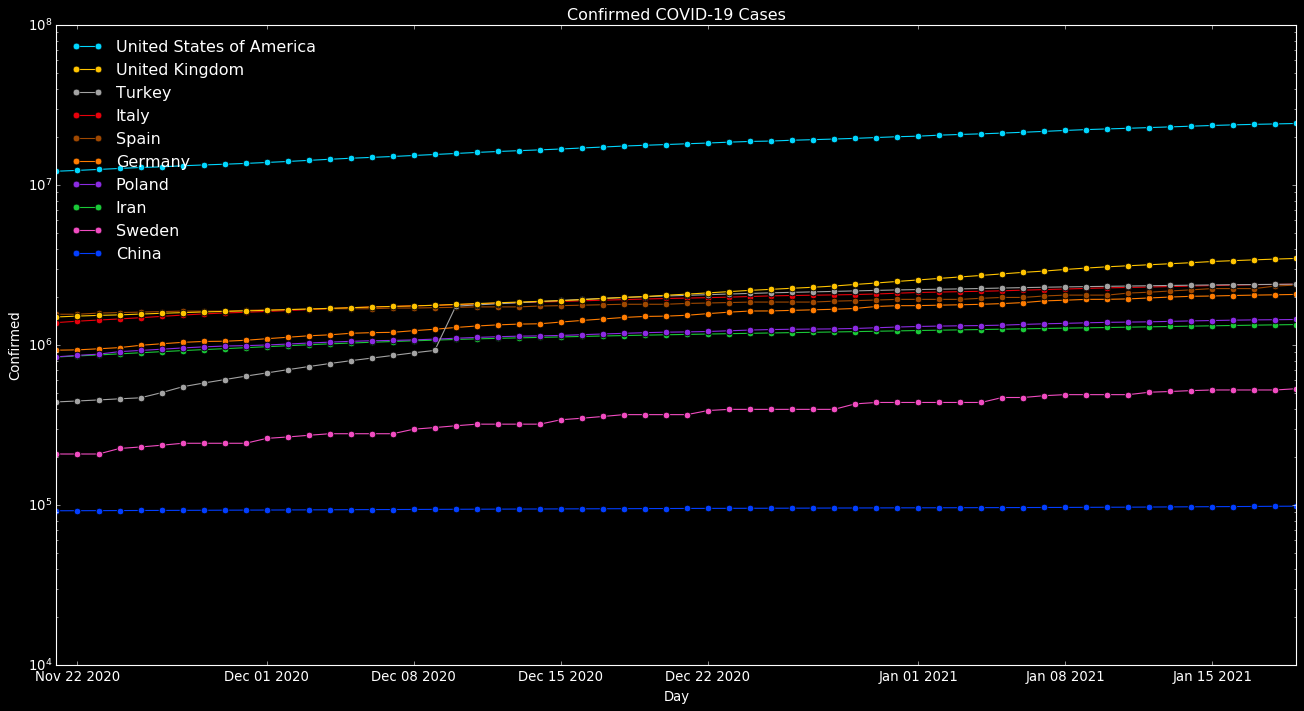

In [118]:
plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='Confirmed',
                     hue='Country',linestyle='-', marker='o',
                     palette='bright',    markeredgecolor="black",
                     data=df
                    )

chart.set_title('Confirmed COVID-19 Cases')
ax.ticklabel_format(style='plain')
handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")

plt.yscale("log")

plt.show();

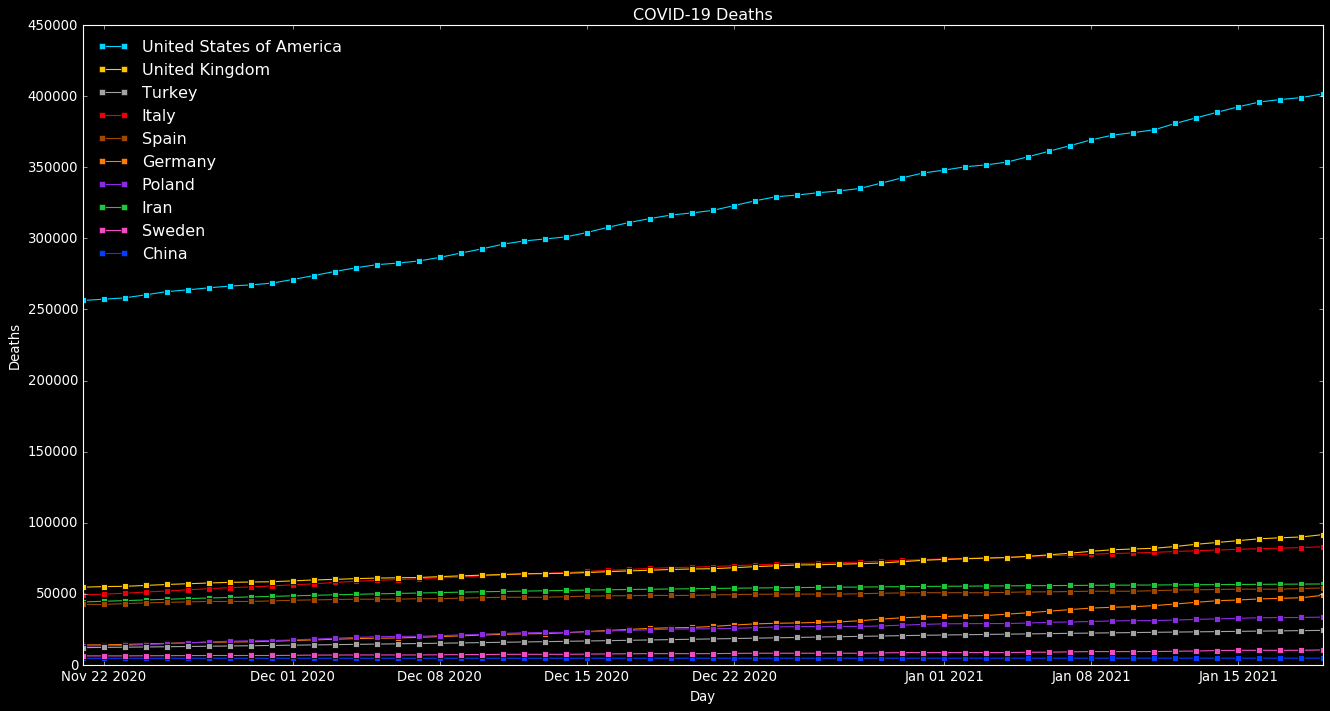

In [119]:
plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='Deaths',
                     hue='Country',linestyle='-', marker='s',
                     palette='bright',    markeredgecolor="black",
                     data=df
                    )

chart.set_title('COVID-19 Deaths')

handles, labels = fix_legend(chart, marker='s')
plt.legend(handles, labels, frameon=False, loc="best")

plt.show();

Dwa zestawy danych 

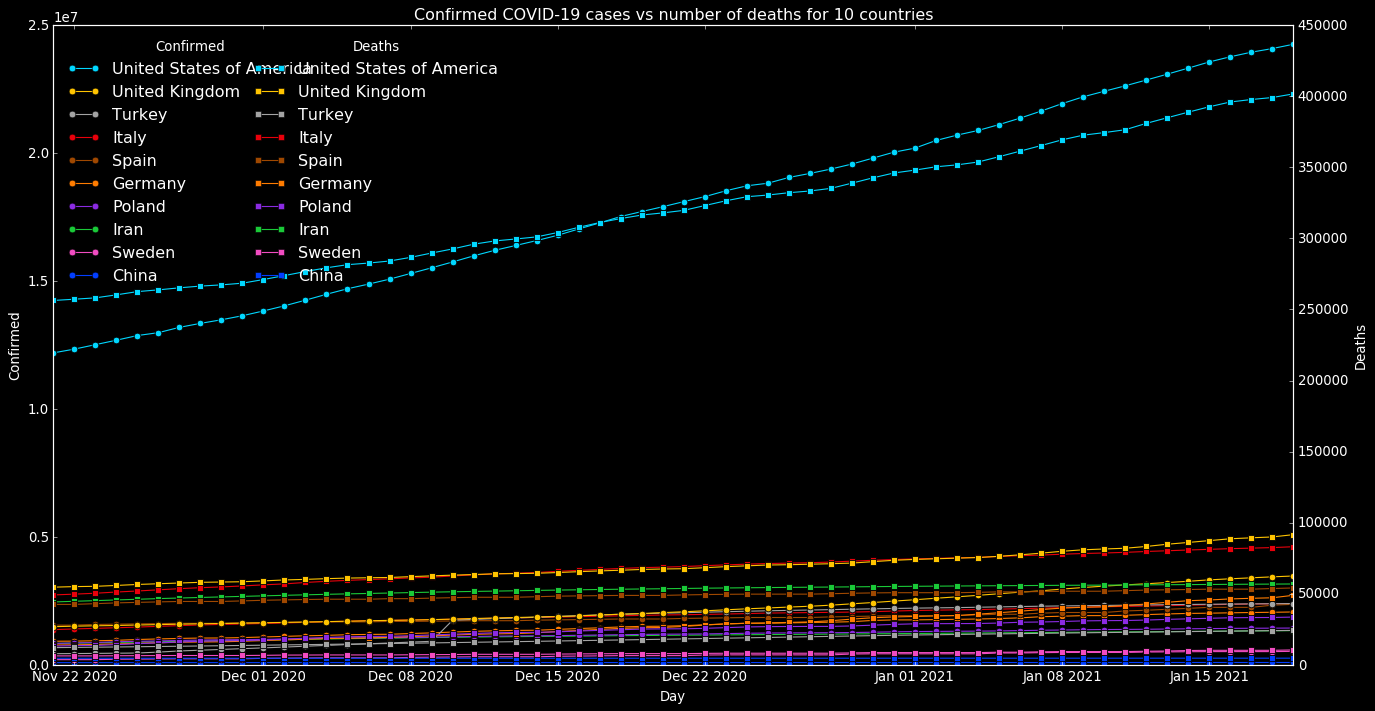

In [120]:
plotdata=df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='Confirmed',
                     hue='Country',linestyle='-', marker='o',
                     palette='bright', markeredgecolor="black",    
                     data=plotdata
                    )


chart.set_title('Confirmed COVID-19 cases vs number of deaths for %d countries' % N)

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc=2, title="Confirmed")

ax2 = chart.twinx()

chart2 = sns.lineplot(x='Day',
                     y='Deaths',
                     hue='Country', linestyle='-', marker='s',
                     palette='bright',    
                     data=plotdata, markeredgecolor="black",
                       ax=ax2
                    )

handles, labels = fix_legend(chart2, marker="s")
legend2 = plt.legend(handles, labels, loc=2, frameon=False, title="Deaths", bbox_to_anchor=(0.15, 1))

plt.show();

Mniej krajów

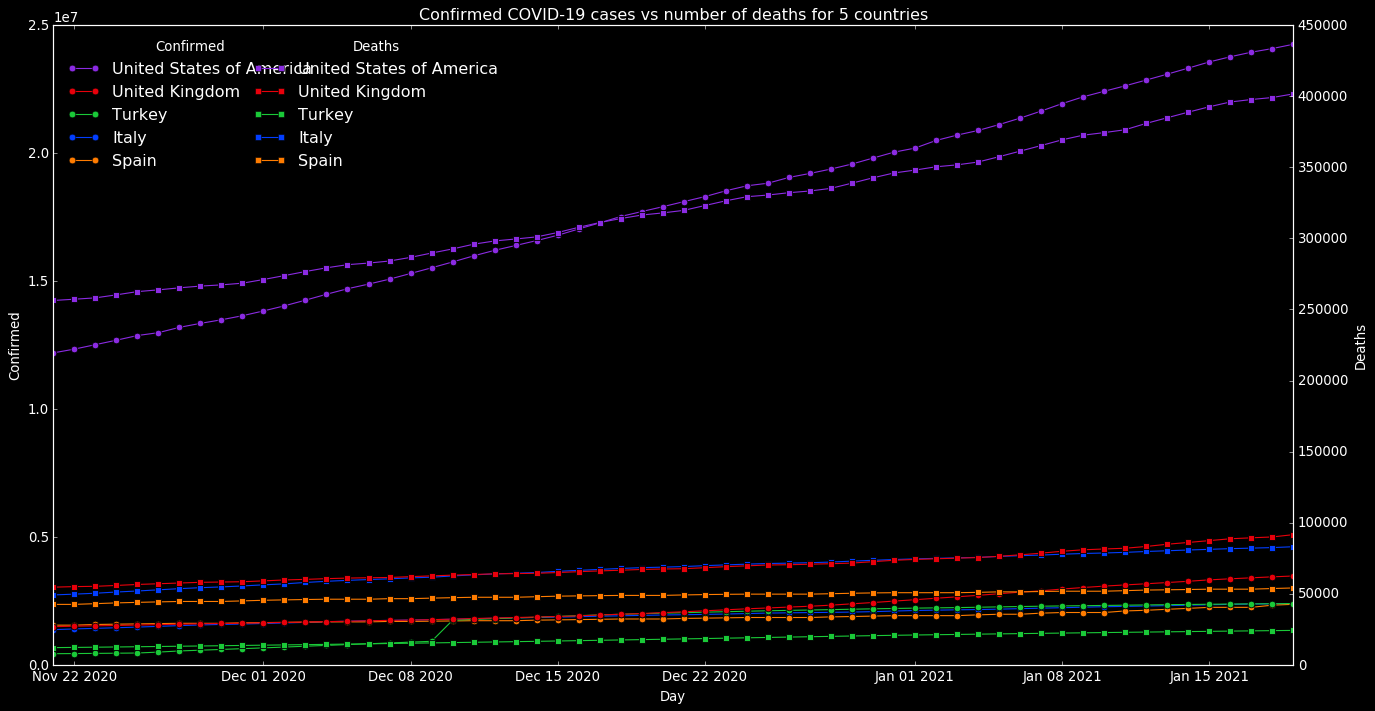

In [123]:
plotdata=smaller_df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='Confirmed',
                     hue='Country',linestyle='-', marker='o',
                     palette='bright',  markeredgecolor="black",
                     data=plotdata
                    )


chart.set_title('Confirmed COVID-19 cases vs number of deaths for %d countries' % (N//2))

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc=2, title="Confirmed")

ax2 = chart.twinx()

chart2 = sns.lineplot(x='Day',
                     y='Deaths',
                     hue='Country', linestyle='-', marker='s',
                     palette='bright',    markeredgecolor="black",
                     data=plotdata,
                       ax=ax2
                    )

handles, labels = fix_legend(chart2, marker="s")
legend2 = plt.legend(handles, labels, loc=2, frameon=False, title="Deaths", bbox_to_anchor=(0.15, 1))

plt.show();

## Dodanie wymiarów - stosunek między wymiarami

In [124]:
df["Mortality"] = 100*df["Deaths"]    / df["Confirmed"] 
df["Recovery"]  = 100*df["Recovered"] / df["Confirmed"] 

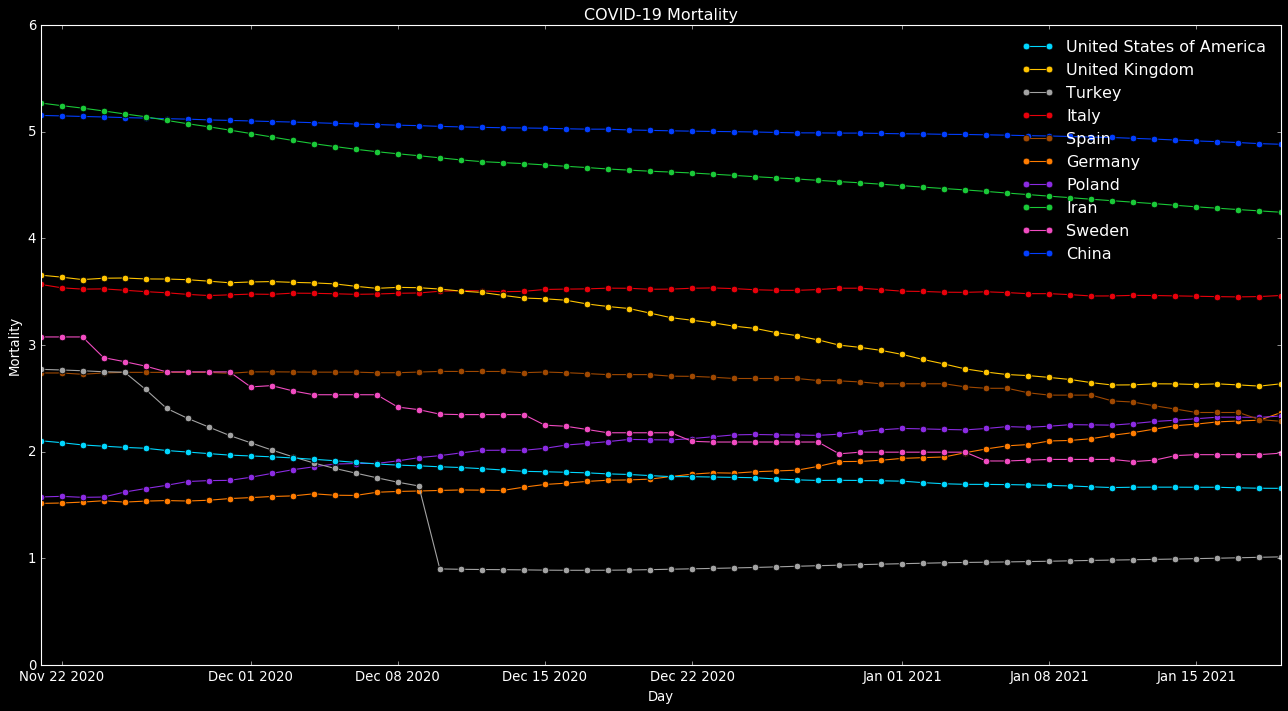

In [125]:
plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='Mortality',
                     hue='Country',linestyle='-', marker='o',
                     palette='bright',    markeredgecolor="black",
                     data=df
                    )

chart.set_title('COVID-19 Mortality')

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")

plt.show();

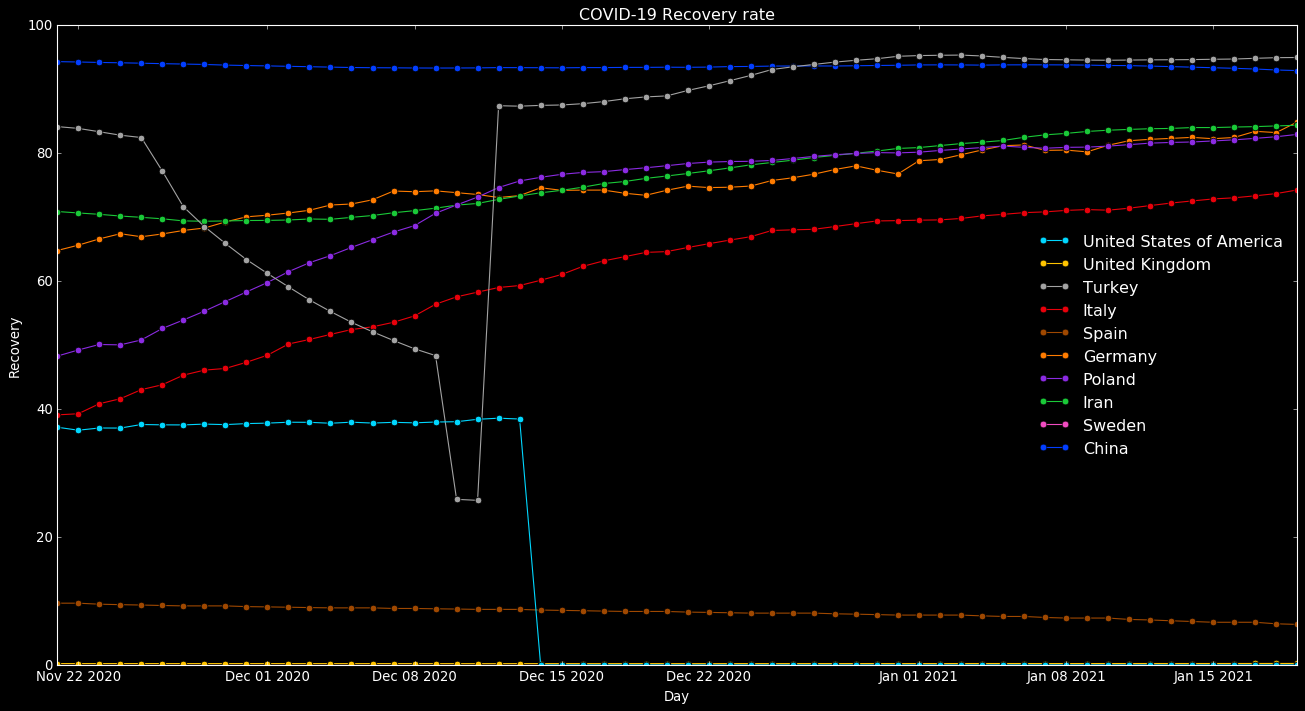

In [126]:
plotdata=df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='Recovery',
                     hue='Country',linestyle='-', marker='o',
                     palette='bright',  markeredgecolor="black",
                     data=plotdata
                    )

chart.set_title('COVID-19 Recovery rate')

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")

plt.show();

## Wymiary jako funkcja kilku wierszy - różnica i średnia krocząca 

In [127]:
result = []

countries = df["Country"].unique()
dataframes = [ df[ df["Country"] == x] for x in countries ] 

for m_df in dataframes:
    country = m_df['Country'].iloc[0]
    m_df = m_df[ ["Day", "Confirmed", "Deaths", "Recovered"] ]
    m_df.set_index("Day", inplace=True)
    df_diff = m_df.diff()
    df_diff.columns=["confirmed change", "deaths change", "recovered change"]
    
    m_df = pd.concat([m_df, df_diff], axis=1, sort=False)
    
    m_df["confirmed pct change"] = 100.0 * m_df["confirmed change"] / m_df["Confirmed"]
    m_df["confirmed pct change"]  = m_df["confirmed pct change"].apply(lambda x: x if x > -50.0 else 0.0)

    m_df["deaths pct change"] = 100.0 * m_df["deaths change"] / m_df["Deaths"]
    m_df["deaths pct change"]  = m_df["deaths pct change"].apply(lambda x: x if x > -50.0 else 0.0)
    m_df["deaths pct change"]  = m_df["deaths pct change"].apply(lambda x: x if x < 399.0 else 0.0)
    
    m_df["rolling deaths change"] = m_df["deaths change"] .rolling(window=ROLL).mean()
    m_df["rolling confirmed pct change"] = m_df["confirmed pct change"] .rolling(window=ROLL).mean()
    m_df["rolling deaths pct change"] = m_df["deaths pct change"] .rolling(window=ROLL).mean()
    m_df = m_df.dropna()
    
    m_df = m_df.sort_values(by="Day")
    m_df["Country"] = country
    m_df.reset_index(inplace=True)
    result.append(m_df)
    
new_df = pd.concat(result, axis=0, sort=False)
today = max(new_df["Day"])
d=new_df[ new_df["Day"] == today].sort_values(by=['Confirmed'], ascending=False).reset_index()
d["index"] = d["Country"]
d.drop(["Country"], axis=1, inplace=True)
d.head(N)

,index,Day,Confirmed,Deaths,Recovered,confirmed change,deaths change,recovered change,confirmed pct change,deaths pct change,rolling deaths change,rolling confirmed pct change,rolling deaths pct change
0,United States of America,2021-01-19,24246830,401553,0,168058.0,2550.0,0.0,0.693113,0.635034,2964.000000,0.844674,0.754683
1,United Kingdom,2021-01-19,3476804,91643,8363,33454.0,1612.0,117.0,0.962206,1.759000,1185.857143,1.296149,1.346330
2,Italy,2021-01-19,2400598,83157,1781917,10496.0,603.0,21428.0,0.437224,0.725134,476.857143,0.589466,0.583518
3,Turkey,2021-01-19,2399781,24328,2277987,6818.0,167.0,7218.0,0.284109,0.686452,168.000000,0.321528,0.705310
4,Spain,2021-01-19,2370742,54173,150376,34291.0,404.0,0.0,1.446425,0.745759,212.857143,1.463843,0.397173
5,Germany,2021-01-19,2071615,48997,1757713,12233.0,1734.0,44517.0,0.590505,3.538992,872.571429,0.727524,1.879226
6,Poland,2021-01-19,1443804,33698,1197034,4890.0,291.0,9315.0,0.338689,0.863553,300.714286,0.481987,0.916274
7,Iran,2021-01-19,1342134,56973,1131883,5917.0,87.0,6384.0,0.440865,0.152704,87.571429,0.465329,0.154420
8,Sweden,2021-01-19,533265,10591,0,9779.0,268.0,0.0,1.833797,2.530450,132.000000,0.720360,1.287387
9,China,2021-01-19,98323,4800,91322,159.0,2.0,59.0,0.161712,0.041667,0.857143,0.179381,0.017865


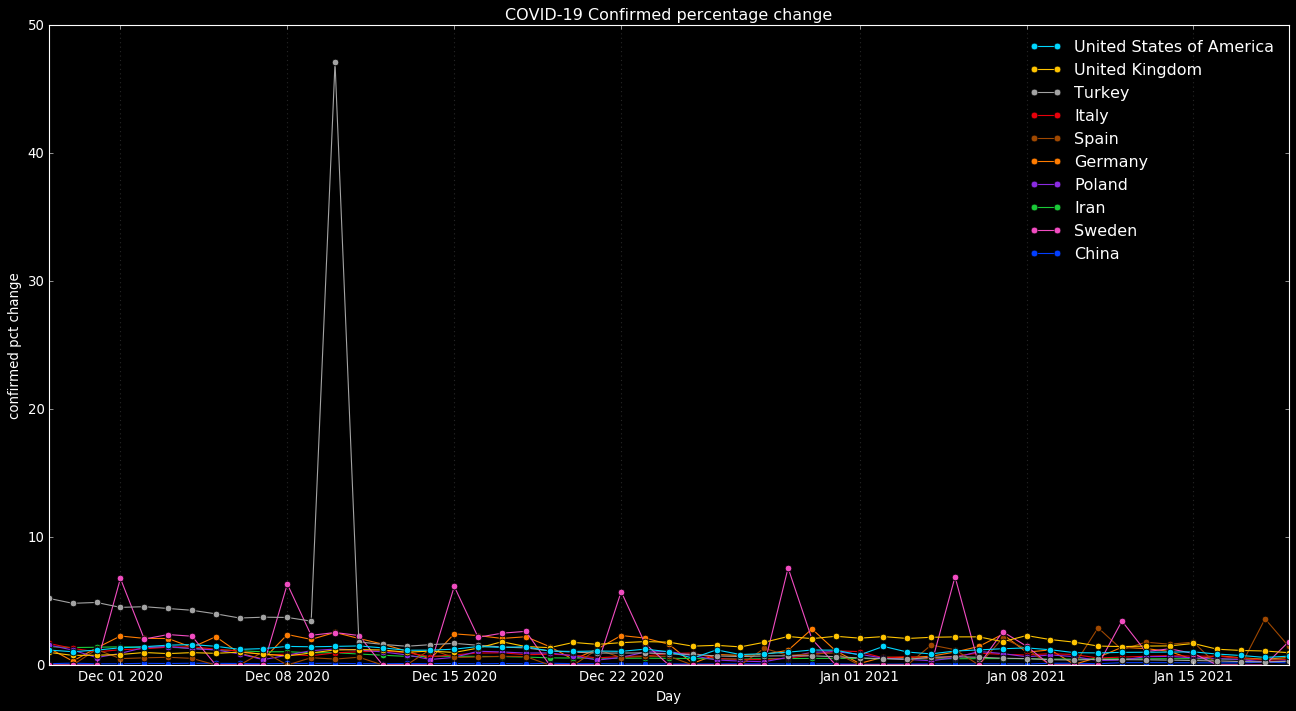

In [128]:
plotdata=new_df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='confirmed pct change',
                     hue='Country',linestyle='-', marker='o',
                     palette='bright', markeredgecolor="black",   
                     data=plotdata
                    )

chart.set_title('COVID-19 Confirmed percentage change')

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")

plt.grid(color='grey', linestyle=':', linewidth=1, alpha=0.3, axis="x")

plt.show();

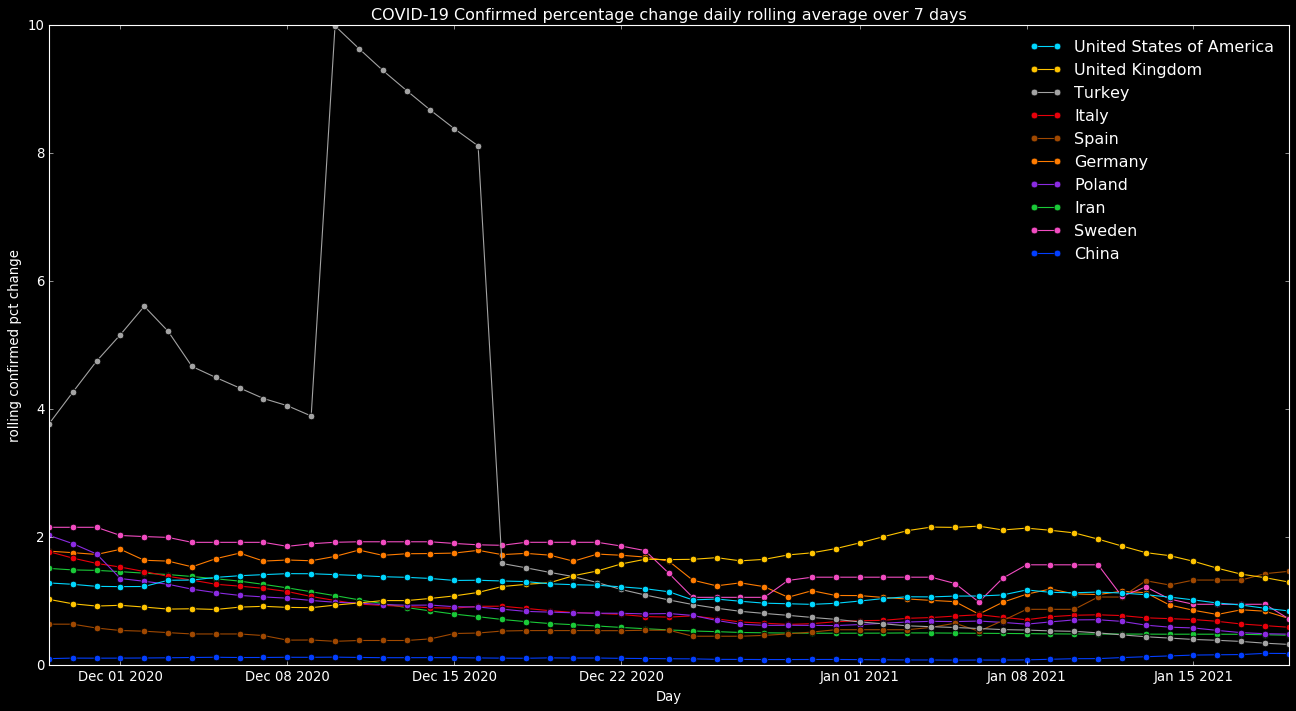

In [129]:
plotdata=new_df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='rolling confirmed pct change',
                     hue='Country',linestyle='-', marker='o',
                     palette='bright', markeredgecolor="black",   
                     data=plotdata
                    )

chart.set_title('COVID-19 Confirmed percentage change daily rolling average over %d days' % ROLL)

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")

plt.show();

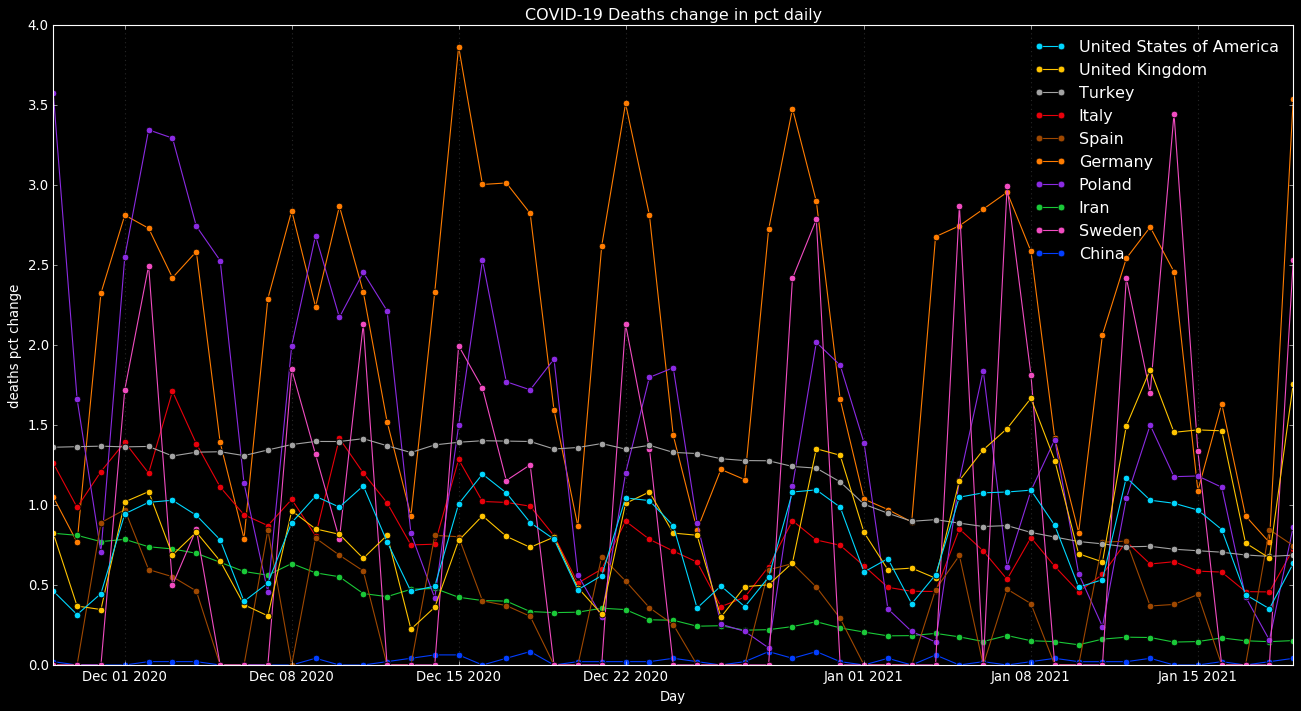

In [130]:
plotdata=new_df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='deaths pct change',
                     hue='Country',linestyle='-', marker='o',
                     palette='bright', markeredgecolor="black",   
                     data=plotdata
                    )

chart.set_title('COVID-19 Deaths change in pct daily')

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")

plt.grid(color='grey', linestyle=':', linewidth=1, alpha=0.3, axis="x")

plt.show();

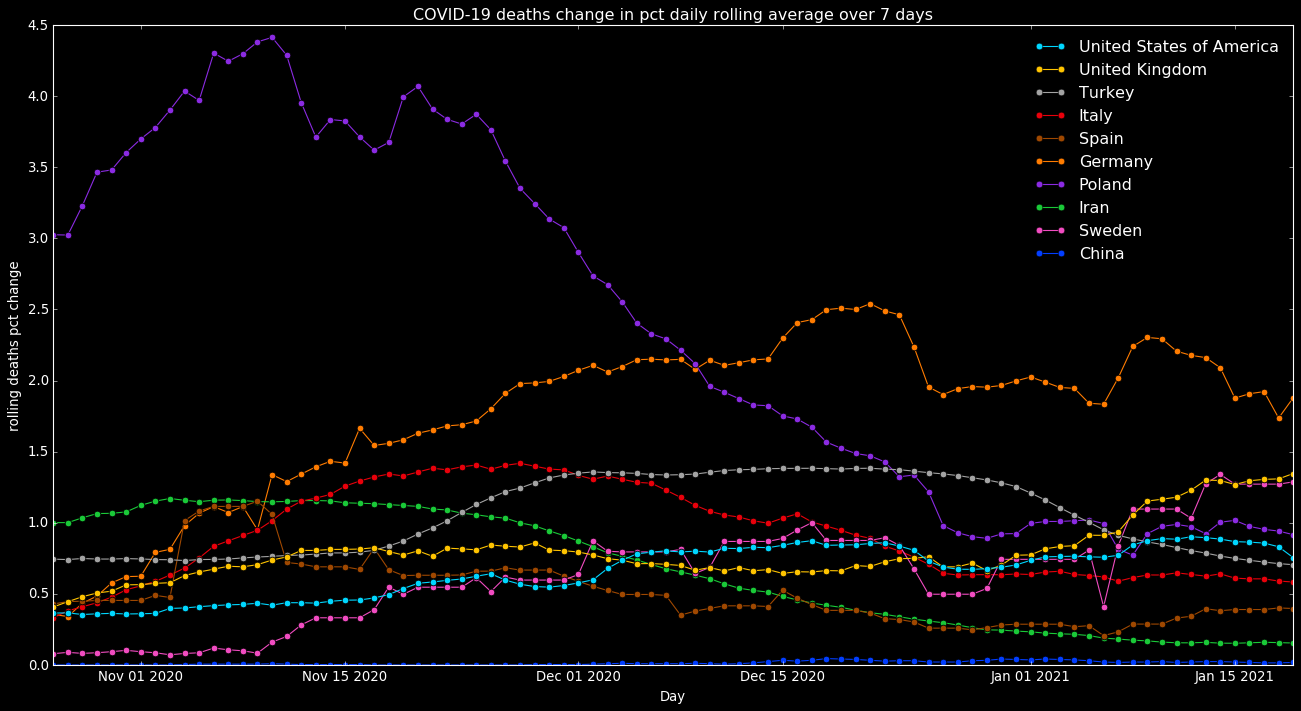

In [108]:
plotdata=new_df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='rolling deaths pct change',
                     hue='Country',linestyle='-', marker='o',
                     palette='bright', markeredgecolor="black",   
                     data=plotdata
                    )

chart.set_title('COVID-19 deaths change in pct daily rolling average over %d days' % ROLL)

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")


plt.show();

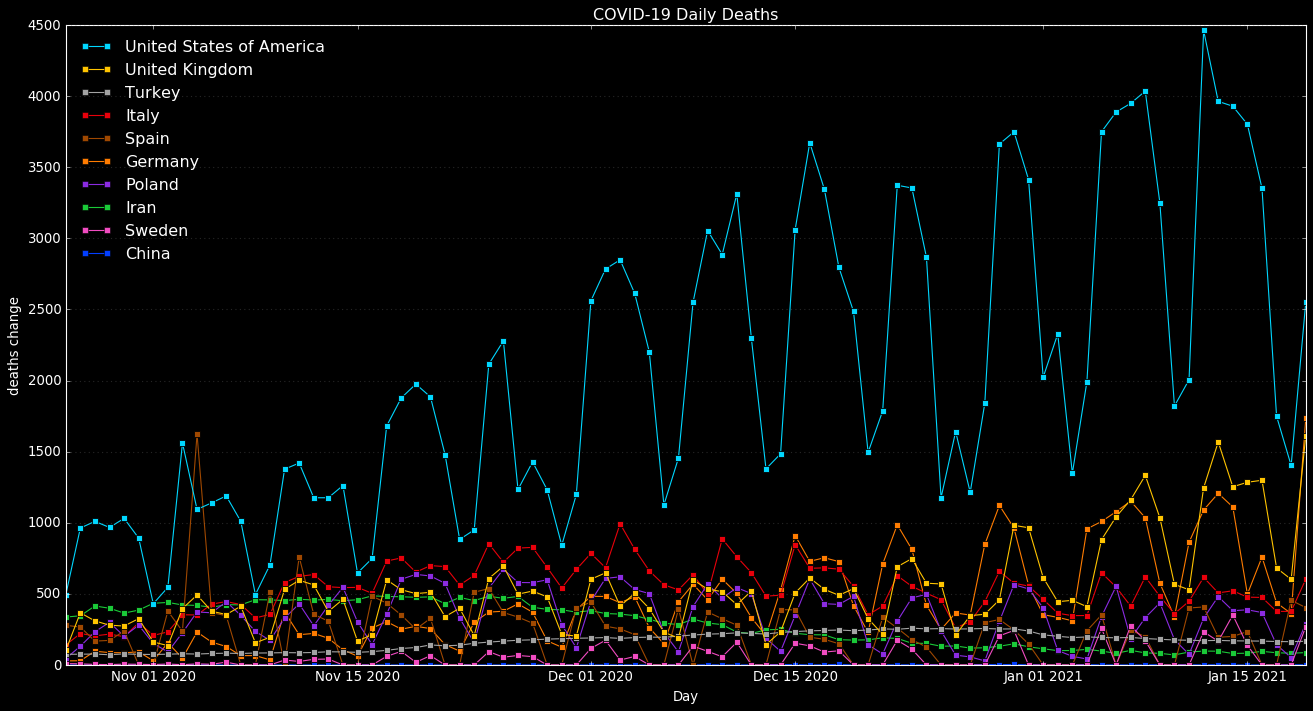

In [109]:
plotdata=new_df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='deaths change',
                     hue='Country',linestyle='-', marker='s',
                     palette='bright', markeredgecolor="black",   
                     data=plotdata
                    )

chart.set_title('COVID-19 Daily Deaths')

handles, labels = fix_legend(chart, marker="s")
plt.legend(handles, labels, frameon=False, loc="best")

plt.grid(color='grey', linestyle=':', linewidth=1, alpha=0.3, axis="y")

plt.show();

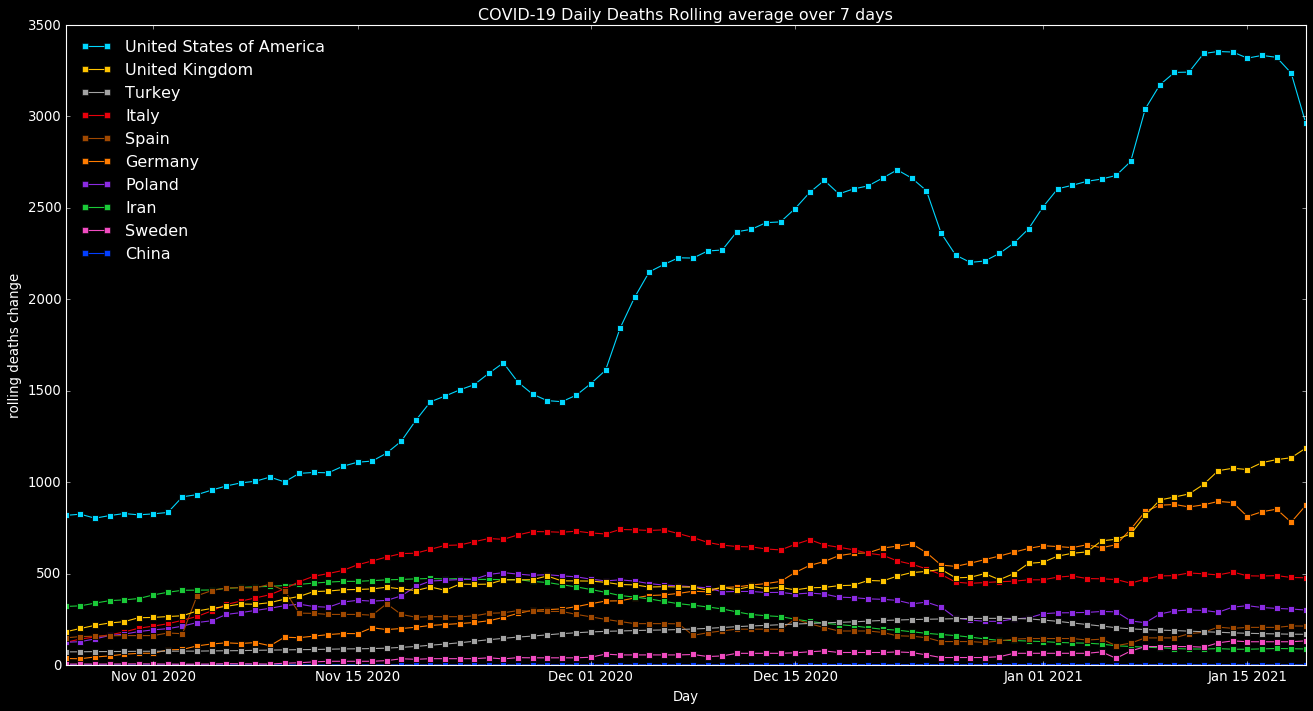

In [110]:
plotdata=new_df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='rolling deaths change',
                     hue='Country',linestyle='-', marker='s',
                     palette='bright', markeredgecolor="black",   
                     data=plotdata
                    )

chart.set_title('COVID-19 Daily Deaths Rolling average over %d days' % ROLL)

handles, labels = fix_legend(chart, marker='s')
plt.legend(handles, labels, frameon=False, loc="best")

plt.show();

## Zmiana wymiaru _X_

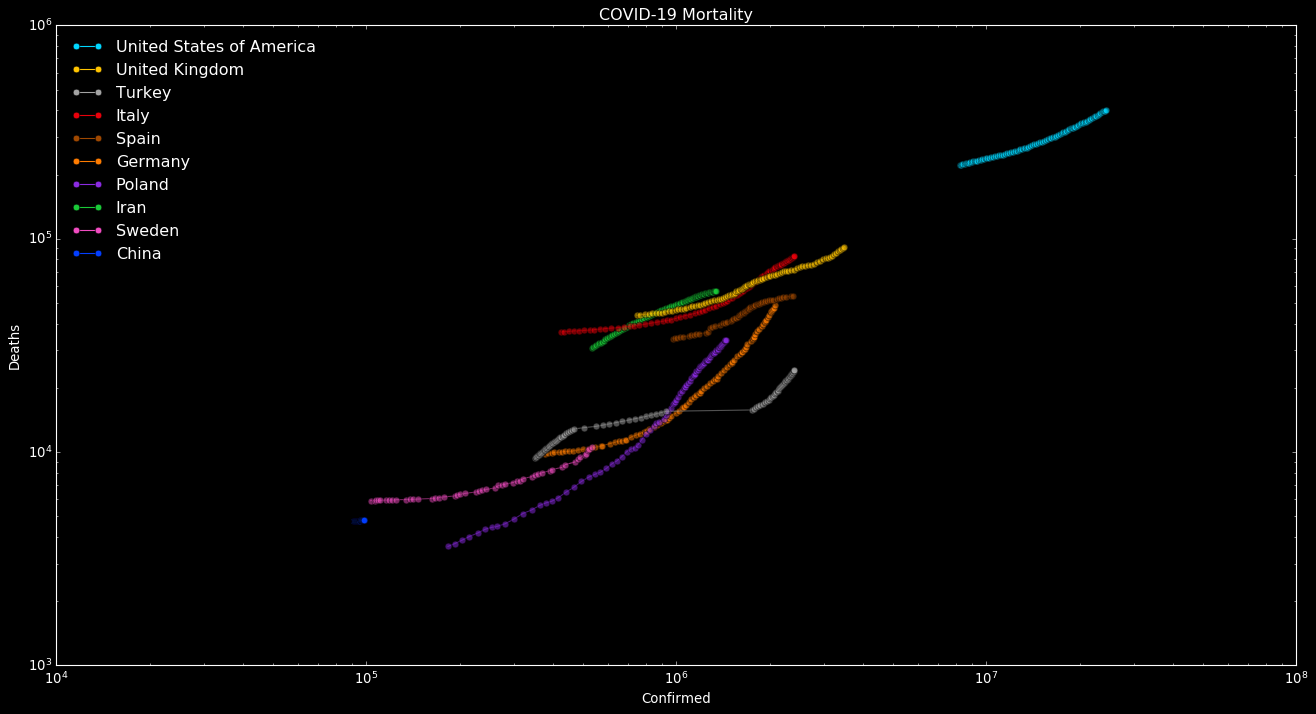

In [111]:
plt.figure(figsize=(20,10))
plt.style.use("dark_background")
plt.xscale("log")
plt.yscale("log")

chart = sns.lineplot(x='Confirmed',
                     y='Deaths', 
                     hue='Country',linestyle='-', marker='o',
                     palette='bright', markeredgecolor="black",   
                     alpha=0.5,
                     data=df
                    )

chart.set_title('COVID-19 Mortality')

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")

plt.show();

---